In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# ELEC 221 Homework 3
Xander Naumenko

## Part a

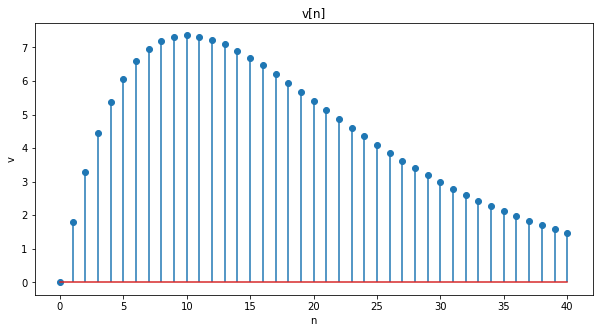

In [26]:
# Construct the data
n = np.array(range(41))
v = 2 * n * np.exp(-0.1 * n)
# Plot v
plt.stem(n, v)
plt.title('v[n]')
plt.xlabel('n')
plt.ylabel('v')
plt.show()

## Part b

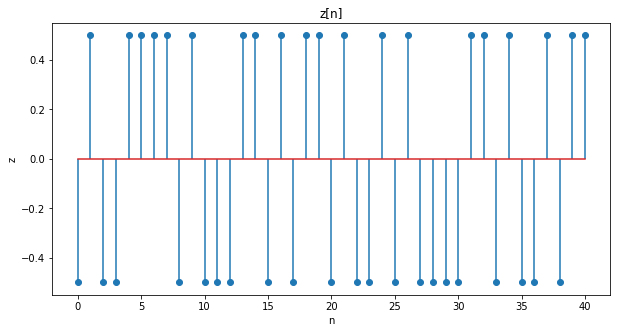

In [27]:
# Generate z
rand_uniform = np.random.rand(41)
z = 1*(rand_uniform>0.5)-1/2
# Plots z
plt.stem(n, z)
plt.title("z[n]")
plt.xlabel('n')
plt.ylabel('z')
plt.show()

## Part c

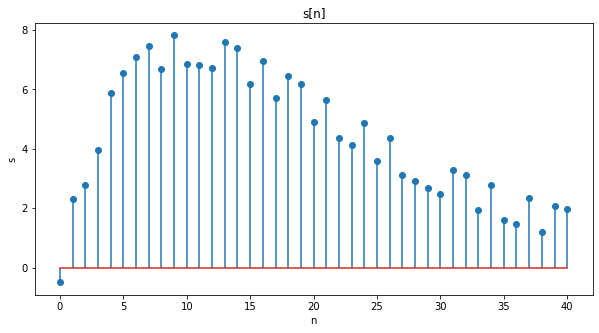

In [28]:
# Add signals together
s = v + z
# Plots data 
plt.stem(n, s)
plt.title('s[n]')
plt.xlabel('n')
plt.ylabel('s')
plt.show()

## Part d

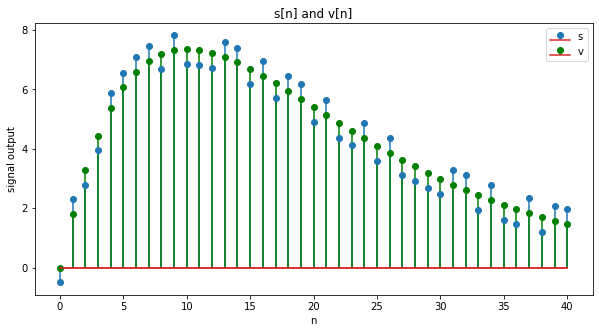

In [29]:
# Plot the data
plt.stem(n, s, label='s')
plt.stem(n, v, 'g', markerfmt='go', label='v')
plt.title('s[n] and v[n]')
plt.legend()
plt.xlabel('n')
plt.ylabel('signal output')
plt.show()


## Part e

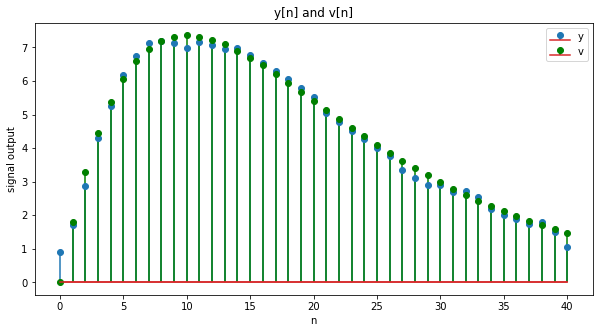

In [30]:
# Calculate running average with iterables
def run_average(x, M):
    return np.array([sum(x[n-k] for k in range(-(M//2), M//2+1) if n-k >= 0 and n-k < len(x)) / M for n in range(len(x))])

# Calculate y
y = run_average(s, 5)

# Graph
plt.stem(n, y, label='y')
plt.stem(n, v, 'g', markerfmt='go', label='v')
plt.title('y[n] and v[n]')
plt.legend()
plt.xlabel('n')
plt.ylabel('signal output')
plt.show()

## Part f

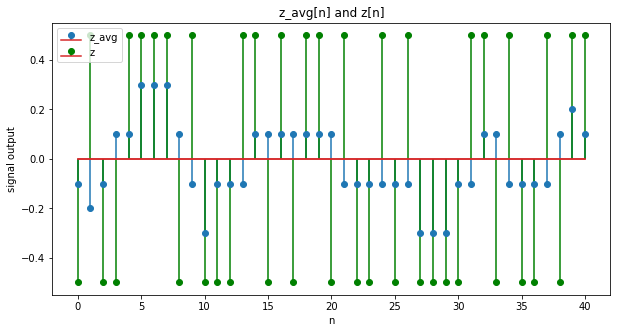

In [31]:
# Calculate averaged z
z_avg = run_average(z, 5)

# Plot data
plt.stem(n, z_avg, label='z_avg')
plt.stem(n, z, 'g', markerfmt='go', label='z')
plt.title('z_avg[n] and z[n]')
plt.legend()
plt.xlabel('n')
plt.ylabel('signal output')
plt.show()


## Explanation
The effect of the running filter is to reduce magnitude of the noise. This is because on average, the noise cancels itself out over the course of the domain. 

## Part g

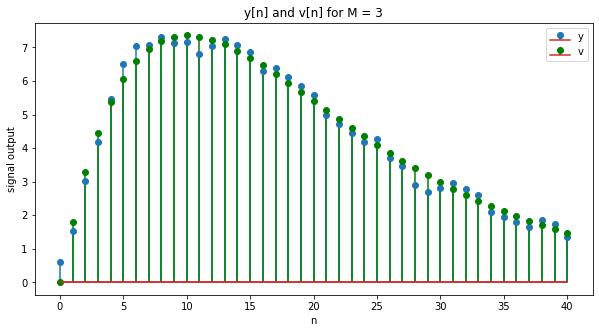

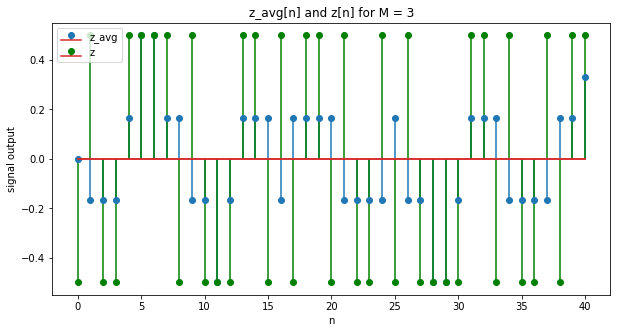

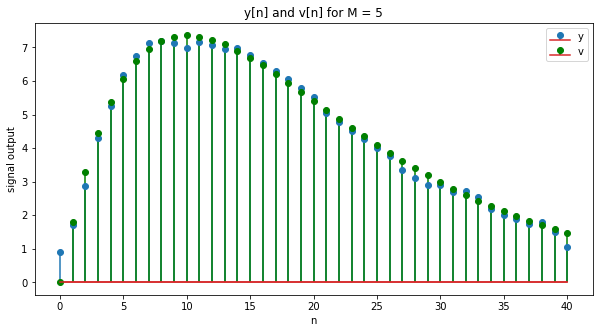

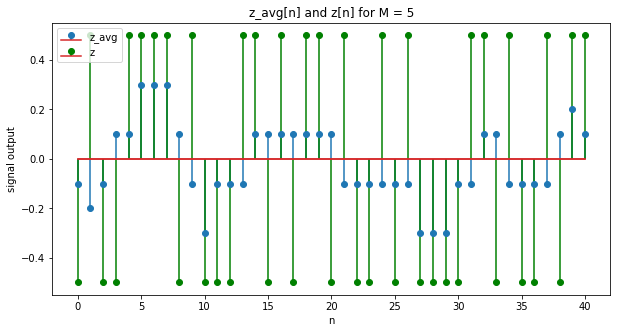

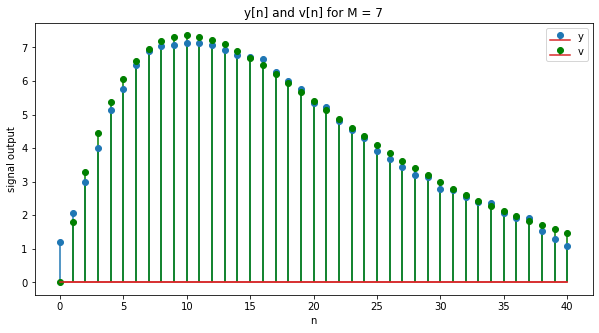

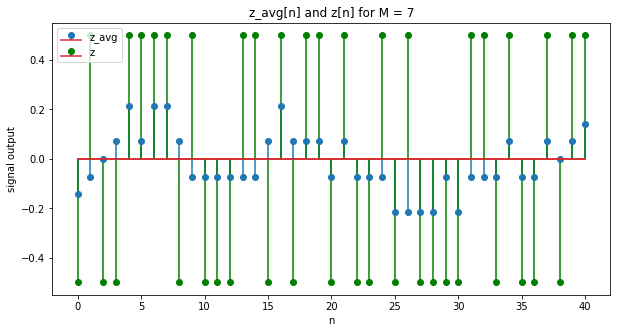

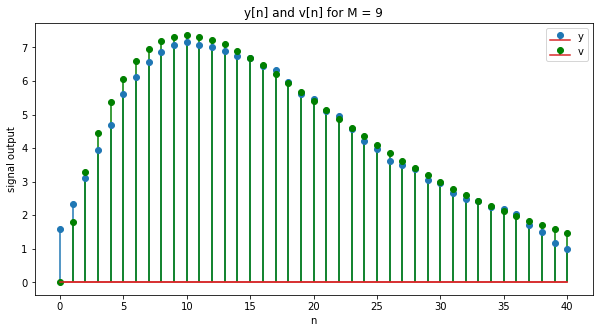

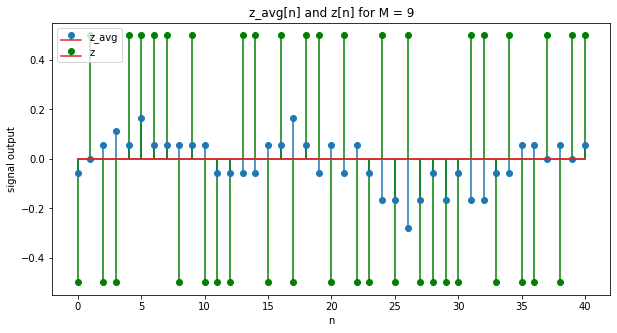

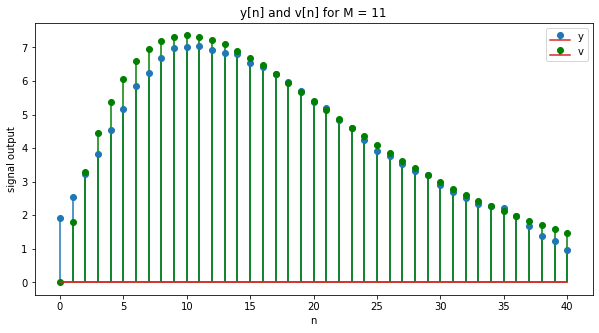

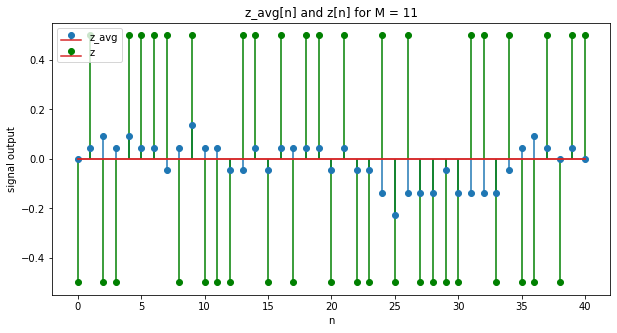

In [32]:
for M in (3, 5, 7, 9, 11):
    # Calculate y
    y = run_average(s, M)

    # Graph
    plt.stem(n, y, label='y')
    plt.stem(n, v, 'g', markerfmt='go', label='v')
    plt.title('y[n] and v[n] for M = ' + str(M))
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('signal output')
    plt.show()

    # Calculate averaged z
    z_avg = run_average(z, M)

    # Plot data
    plt.stem(n, z_avg, label='z_avg')
    plt.stem(n, z, 'g', markerfmt='go', label='z')
    plt.title('z_avg[n] and z[n] for M = ' + str(M))
    plt.legend()
    plt.xlabel('n')
    plt.ylabel('signal output')
    plt.show()


Observations: The higher M, the more the noise gets averaged out. However in increasing M it also reduces the accuracy of the original signal because the value at every point is based on points farther and farther away. 

## Part h

To calculate the frequency response we first must find the impulse response. For a running average filter, intuitively the output of an impulse response should only be when included when $n=0$ is within range of the filter's order. Mathematically this is 

$$
    h[n]=\frac15\sum_{k=-2}^2 \delta[n-k]=\begin{cases}\frac15&\text{if }|n|<3\\0&\text{otherwise}\end{cases}
$$

The finding the frequency response we get 

$$
    H(e^{j\omega})=\sum_{n=-\infty}^{\infty}h[n]e^{-j\omega n}\\
    =\frac15\sum_{n=-2}^{2}e^{-j\omega n}
$$



## Part i
Using the obvious generalization of part h, we find that 

$$
    h[n]=\frac1M\sum_{k=-(M-1)/2}^{(M-1)/2} \delta[n-k]=\begin{cases}\frac1M&\text{if }|n|\leq\frac{M-1}{2}\\0&\text{otherwise}\end{cases}
$$

Plugging this into the formula for the frequency response we get 

$$
    H(e^{j\omega})=\sum_{n=-\infty}^{\infty}h[n]e^{-j\omega n}\\
    =\frac1M\sum_{n=-(M-1)/2}^{(M-1)/2}e^{-j\omega n}
$$



## Part j

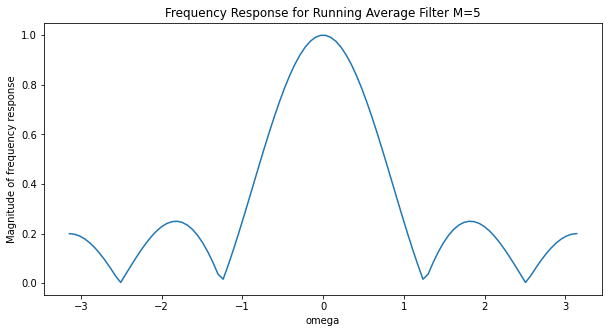

In [41]:
# Gets frequency response using iterables
def H(omega, M):
    return 1/M*sum(np.exp(-1j*omega*n) for n in range(-(M//2), M//2+1))

# Generates data for M=5 to check
omega = np.linspace(-np.pi, np.pi, 100)
H5 = H(omega, 5)

plt.plot(omega, np.abs(H5))
plt.title('Frequency Response for Running Average Filter M=5')
plt.xlabel('omega')
plt.ylabel('Magnitude of frequency response')
plt.show()

## Part k

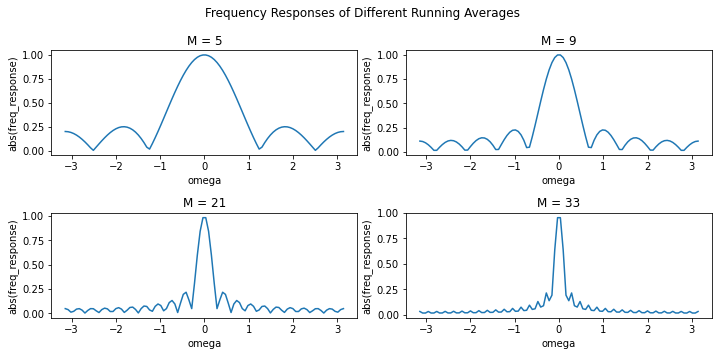

In [55]:
omega = np.linspace(-np.pi, np.pi, 100)

# Loop through plots
fig, axs = plt.subplots(2, 2)
for i, M in enumerate((5, 9, 21, 33)):
    freq_response = H(omega, M)
    axs[(i//2)%2, i%2].plot(omega, np.abs(freq_response))
    axs[(i//2)%2, i%2].title.set_text('M = '+str(M))
    axs[(i//2)%2, i%2].set_xlabel('omega')
    axs[(i//2)%2, i%2].set_ylabel('abs(freq_response)')


fig.suptitle('Frequency Responses of Different Running Averages')
fig.tight_layout()

As we increase $M$, the frequency response gets narrower and narrower. This corresponds to a low pass filter, since only low frequencies are let through and others are suppressed. 

## Part l
First we find the impulse response. To do so we can use the impulse resposne we found in part h, coupled with the fact that the filter is linear. $y[n]=x[n]$ is just the identity so has an impulse response of $\delta[n]$, so

$$
    h_2[n]=\delta[n]+h_1[n]=\delta[n]-\frac15\sum_{k=-2}^2 \delta[n-k]=\begin{cases}\frac45&\text{if }n=0\\\frac15&\text{if }|n|<3\text{ and } n\neq0\\0&\text{otherwise}\end{cases}
$$

We can then plug this into the formula for the frequency response. 


$$
    H_2(e^{j\omega})=\sum_{n=-\infty}^{\infty}h[n]e^{-j\omega n}\\
    =1-\frac15\sum_{n=-2}^{2}e^{-j\omega n}
$$

To see what kind of filter this is we can plot the frequency response:


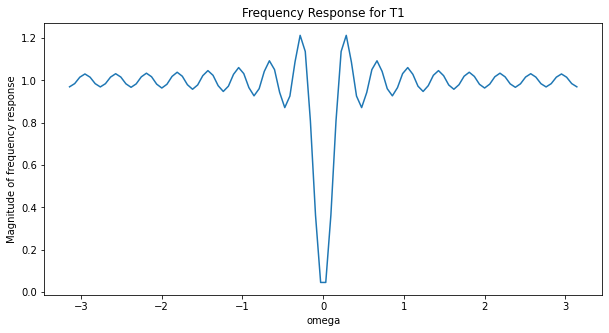

In [69]:
# Gets frequency response using previously defined function
def H2(omega, M):
    return 1 - H(omega, M)

omega = np.linspace(-np.pi, np.pi, 100)
freq_response = H2(omega, 33)
plt.plot(omega, np.abs(freq_response))
plt.title('Frequency Response for T1')
plt.xlabel('omega')
plt.ylabel('Magnitude of frequency response')
plt.show()

As we see in the graph this approximates a high pass filter when implemented. 